In [3]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load credit card fraud data
transactions_df = pd.read_csv("data/creditcard.csv", header=0)
transactions_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
sns.set()
sns.set_style("whitegrid")

transactions_df.dropna()

FRAUDULENT_CLASS   = 1
NUMBER_OF_CLASSES  = 2

In [6]:
# get the percentage of each of data for each class
def fraudulent_percentage(transactions_df):
    global FRAUDULENT_CLASS
    
    total_data_length = transactions_df.shape[0]
    fraudulent_data = transactions_df[transactions_df['Class']==FRAUDULENT_CLASS]
    fraudulent_data_length = fraudulent_data.shape[0]
    fraudulent_data_percent = fraudulent_data_length/total_data_length
    
    ## print stats
    print("total_data_length: ", total_data_length)
    print("fraudulent_data_length: ", fraudulent_data_length)
    print("fraudulent_percentage: ", fraudulent_data_percent)
    
    return fraudulent_data_percent

In [7]:
fraudulent_transactions_percent = fraudulent_percentage(transactions_df)

total_data_length:  284807
fraudulent_data_length:  492
fraudulent_percentage:  0.001727485630620034


In [8]:
## now split the data into training and test data bins
def train_test_split(transaction_df, train_frac= 0.7, seed=1):
    
    # seed for repeatability
    np.random.seed(seed)
    
    transaction_matrix = transaction_df.as_matrix()
    np.random.shuffle(transaction_matrix)
    
    data_len = transaction_df.shape[0]
    train_data_len = int(train_frac*transaction_df.shape[0])
    
    # shuffle and split the data
    train_features = transaction_matrix[0:train_data_len, 0:transaction_df.shape[1]-2]
    train_labels   = transaction_matrix[0:train_data_len, transaction_df.shape[1]-1]
    test_features  = transaction_matrix[train_data_len:data_len, 0:transaction_df.shape[1]-2]
    test_labels    = transaction_matrix[train_data_len:data_len,  transaction_df.shape[1]-1]
    
    return (train_features, train_labels), (test_features, test_labels)

In [9]:
(train_features, train_labels), (test_features, test_labels) = train_test_split(transactions_df)

print("train_data_length: ", train_features.shape[0])
print("test_data_length: ", test_features.shape[0])
print("total_data_length: ", transactions_df.shape[0])
try:
    assert(transactions_df.shape[0]== (train_features.shape[0] + test_features.shape[0]))
    print("\nTest passed\n")
except Exception as ex:
    print("total data length is not the same")

print(train_features.shape)
print(train_labels.shape)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


train_data_length:  199364
test_data_length:  85443
total_data_length:  284807

Test passed

(199364, 29)
(199364,)


In [10]:
# Helper functions to evaluate metrics
def evaluate(test_features, test_labels, estimated_params, verbose=True):
    
    test_preds = fit_model(test_features, estimated_params[0], estimated_params[1]).reshape(test_labels.shape)
    
    # calculate true positives, false positives, true negatives, false negatives
    tp = np.logical_and(test_labels, test_preds).sum()
    fp = np.logical_and(1-test_labels, test_preds).sum()
    tn = np.logical_and(1-test_labels, 1-test_preds).sum()
    fn = np.logical_and(test_labels, 1-test_preds).sum()

    # calculate binary classification metrics
    recall    = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy  = (tp + tn) / (tp + fp + tn + fn)
    f1_score  = 2.0*recall*precision/(recall + precision)
    
    if (verbose == True):
        # printing a table of metrics
        print("\n{:<11} {:.3f}".format('Recall:', recall))
        print("{:<11} {:.3f}".format('Precision:', precision))
        print("{:<11} {:.3f}".format('Accuracy:', accuracy))
    
    confusion_matrix = pd.crosstab(test_labels, test_preds, rownames=['actual (row)'], colnames=['prediction (col)'])
    
    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 
            'Precision': precision, 'Recall': recall, 'Accuracy': accuracy, 'F1_Score': f1_score, 
            'confusion_matrix': confusion_matrix}

# Linear Classifer
A linear classifier tries to fit a hyperplane across N-dimensions to split the data into two categories.  
To do this we need to define an objective function and estimate parameters in that objective function.  
As we are trying to fit a linear hyperplane in N-dimensions, we can a linear model of type,  
$$ f(X, W, b) = WX + b $$
So, the objective function now becomes,
$$  min \space J(W,b) = \frac{1}{2N}\sum_{i=1}^{N} \left(f(X, W, b) - Y \right)^2 $$
where,  
> $K$, is the number of class categories  
> $N$, is the training/learning data length.  
> $D$, is the number of features in a given data point

A Steepest descent algorithm can be used to estimate parameters, $ W, b $.
  
Unlike linear regression which outputs continuous values for prediction, a logistic regression transforms its output using the logistic sigmoid/logistic function to return a probability value which can be mapped to 2 or more discrete classes.   
  
The function, $ f(X, W, b) $, outputs/predicts probabilities of each class. So, in-order to convert this probability to a binary class, we can use a Sigmoid or soft-max function.  
A Sigmoid function is logistic function that transforms any real-value into a space $ \left[0, 1.0\right] $. 
$$ \sigma(X) = \frac{1.0}{1.0+\exp(-X)} $$  
A tipping point can be used, where values greater than tipping point can be positive class and values less than tipping point can be a negative class.  
  
For multi-class problem, a Softmax(normalized exponential) function can be used and usually the class with higher-probability wins. A Softmax function takes an input vector of $K$ real-numbers and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers.  
$$ \sigma(Z_i) = \frac{\exp(Z_i)}{\sum_{j=1}^{K}\exp(Z_j)}$$  
  
Binary logistic regression, multinomial logistic regression, ordinal logistic regression (deals with dependent variables that are ordered).  

By using high-order polynomial terms, we can get even more complex decision boundaries.

## Non-Convex function
Mean-Squared Error is a good cost function for linear regression. But when it comes to logistic regression, because of the sigmoid function, this MSE cost function becomes non-linear and in-turn will be non-convex function. Which means many local minimas exist. This could or could not work and the numerical optimizer might get stuck in one of the local minimas.  
To deal with this, the cost function can be organized as, 
\begin{eqnarray}
Cost (X, W, b, Y) &=& -\log(f(X,W,b), \space \text{if} \space Y=1 \\
                  &=& -\log(1-f(X,W,b)), \space \text{if} \space Y=0
\end{eqnarray}

This means, when we predict right, the cost will be 0 and if we predict wrong the cost will slowly increase to infinity, penalizing the system. Inverted for the other class to get the same behavior. So, the final cost function can be written as (for binary classification) , 
$$ J(X,W,b,Y) = -Y\log(f(X,W,b)) - (1-Y)\log(1-f(X,W,b)) $$
This can be interpreted as if Y is 0, first term gets neglected. If Y is 1, then second-term gets neglected.  
In vector form,
$$ min \space J(X,W,b,Y) = \frac{-1}{2N}\left[Y^T\log(f(X,W,b)) + (1-Y)^T\log(1-f(X,W,b))\right]$$

The above representation is also called as cross-entropy cost function. 

In [11]:
def sigmoid_func(X):
    sigmoid_X = 1.0 / (1.0 + np.exp(-X))
    return sigmoid_X

def apply_decision_boundary(X):
    return np.where(X > 0.5, 1, 0)

def fit_model(data, weights, bias):
    
    # model we are fitting is, W*X^T + b
    WX = np.matmul(weights, data.T)
    
    WX_b = WX
    for class_idx in range(0, bias.shape[0]):
        WX_b[class_idx, :] = WX_b[class_idx, :] + bias[class_idx]
    
    # apply sigmoid function.
    # as the predicted values will be probability, applying sigmoid value will translate into 0, 1
    WX_b = sigmoid_func(WX_b)
    WX_b = apply_decision_boundary(WX_b)
    
    return WX_b

def fit_model_with_prob(data, weights, bias):
    
    # model we are fitting is, W*X^T + b
    WX = np.matmul(weights, data.T)
    
    WX_b = WX
    for class_idx in range(0, bias.shape[0]):
        WX_b[class_idx, :] = WX_b[class_idx, :] + bias[class_idx]
    
    # apply sigmoid function.
    # as the predicted values will be probability, applying sigmoid value will translate into range 0, 1
    WX_b = sigmoid_func(WX_b)
    
    return WX_b

# cost function based on Mean-Squared Error with sigmoid prediction function
def cost_function_MSE(data, decision_vars, class_labels, class_weight=None):
    # data: size (N x D)
    # decision_vars: size (K x D)
    # class_labels: size (K x N)
    
    model_val = fit_model(data, decision_vars[0], decision_vars[1])
    error = np.subtract(model_val, class_labels)
    
    error_sq = np.power(error, 2.0)
    error_sq_mean = np.mean(error_sq)
    return error_sq_mean/2.0

# gradient of the cost function w.r.to decision variables, weights & bias, by substituting sigmoid function into 
# J. Note that because of the derivative of the sigmoid function being present in the gradient, this will affect our
# algorithm convergence. As sigmoid function is a very smooth and almost saturates at 0, 1.
def model_gradient_MSE(data, decision_vars, class_labels, class_weight=None):
    gradient  = np.empty((2,1), dtype=object)
    data_len  = data.shape[0]
    
    model_val = fit_model(data, decision_vars[0], decision_vars[1])
    error     = np.subtract(model_val, class_labels)
    error_X   = np.matmul(error, data)
    
    # calculate gradient of the sigmoid function
    sigmoid_val = fit_model_with_prob(data, decision_vars[0], decision_vars[1])
    sigmoid_gradient = np.dot(sigmoid_val, (1 - sigmoid_val).transpose())
    
    # dJ/dW
    gradient[0][0] = error_X * sigmoid_gradient /data_len
    
    # dJ/db
    # as this error term will be the same, just take one of them
    gradient[1][0] = np.array(np.mean(error * sigmoid_gradient))
    
    return gradient

def cost_function_CrossEntropy(data, decision_vars, class_labels, class_weight=None):
    # data: size (N x D)
    # decision_vars: size (K x D)
    # class_labels: size (K x N)
    
    predicted_class = fit_model(data, decision_vars[0], decision_vars[1])
    
    # work around, instead of supplying 0 to log, supply some small value so as to get the desired affect in the cost
    predicted_class = np.where(predicted_class < 1e-5, 1e-8, predicted_class)
    
    predicted_neg_class = 1.0 - predicted_class
    predicted_neg_class = np.where(predicted_neg_class < 1e-5, 1e-8, predicted_neg_class)
    
    log_prediction_pos_class = np.log(predicted_class)
    log_prediction_neg_class = np.log(predicted_neg_class)
    
    desired_neg_class = np.subtract(1, class_labels)
    desired_pos_class = class_labels
    
    cross_entropy =  np.dot(log_prediction_pos_class, desired_pos_class) \
                   + np.dot(log_prediction_neg_class, desired_neg_class)
      
    cross_entropy_mean = -cross_entropy/data.shape[0]
    return cross_entropy_mean

def model_gradient_CrossEntropy(data, decision_vars, class_labels, class_weight=None):
    gradient  = np.empty((2,1), dtype=object)
    data_len  = data.shape[0]
    
    model_val = fit_model(data, decision_vars[0], decision_vars[1])
    error     = np.subtract(model_val, class_labels)
    error_X   = np.matmul(error, data)
    
    # dJ/dW
    gradient[0][0] = error_X/data_len
    
    # dJ/db
    # as this error term will be the same, just take one of them
    gradient[1][0] = np.array(np.mean(error))
    
    return gradient

def generate_batch_indices(data_len, batch_size=100):   
    shuffle_indexing = np.random.permutation(data_len)
    n_batches        = int(data_len / batch_size)
    
    total_batch_len = n_batches*batch_size
    left_over_data  = data_len - total_batch_len
    
    batch_indices   = [None]*n_batches
    for batch_iter in range(0, n_batches):
        batch_indices[batch_iter] = shuffle_indexing[batch_iter*batch_size : (batch_iter+1)*batch_size]
    
    if (left_over_data > 0):
        batch_indices.append(shuffle_indexing[total_batch_len : data_len])
    
    return batch_indices

In [12]:
def steepest_descent(data, class_labels, initial_conditions,
                     cost_func, cost_func_gradient, 
                     n_iter=10, 
                     step_size=0.8, 
                     batch_size=500,
                     class_weight=None,
                     stopping_tol=1e-3):
    
    estimated_params = initial_conditions
    cost_func_trend  = [None]*(n_iter+1)
    
    total_cost = cost_func(data, estimated_params, class_labels, class_weight)
    cost_func_trend[0] = total_cost
    
    error = total_cost
    
    for iteration in range(0, n_iter):
        if (error > stopping_tol):
            batch_indices_list = generate_batch_indices(data.shape[0], batch_size)

            for batch_indices in batch_indices_list:
                train_data   = data[batch_indices, :]
                train_labels = class_labels[batch_indices]

                gradient = cost_func_gradient(train_data, estimated_params, train_labels, class_weight)

                # update Weights
                estimated_params[0] = np.add(estimated_params[0], -step_size*gradient[0][0])

                # update bias
                estimated_params[1] = np.add(estimated_params[1], -step_size*gradient[1][0])

            total_cost = cost_func(data, estimated_params, class_labels, class_weight)

            cost_func_trend[iteration+1] = total_cost
            error = np.abs(total_cost - error)
    
    return estimated_params, cost_func_trend

## Compare estimation of parameters based on MSE cost (non-Convex) and cross-entropy cost (Convex)

In [13]:
## scale full data to be in the range 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_features)
train_features_scaled = scaler.transform(train_features)
scaler.fit(test_features)
test_features_scaled  = scaler.transform(test_features)

In [16]:
# start with small sample size to test out the implementation
sample_size = train_features.shape[0]
NUMBER_OF_FEATURES = 28

initial_weights = 0.1*np.ones((1, NUMBER_OF_FEATURES))
initial_bias    = np.array([0.5])

# First do estimation based on the Mean-Squared Error
estimated_params_MSE, obj_fun_trend_MSE = steepest_descent(train_features[0:sample_size, 1:], 
                                                           train_labels[0:sample_size], 
                                                           [initial_weights, initial_bias], 
                                                           cost_function_MSE,
                                                           model_gradient_MSE, 
                                                           n_iter=300,
                                                           step_size=0.35,
                                                           batch_size=500)

In [17]:
# second do estimation based on the Cross-Entropy cost function
estimated_params_CE, obj_fun_trend_CE = steepest_descent(train_features[0:sample_size, 1:], 
                                                        train_labels[0:sample_size], 
                                                        [initial_weights, initial_bias],
                                                        cost_function_CrossEntropy,
                                                        model_gradient_CrossEntropy, 
                                                        n_iter=300,
                                                        step_size=0.45,
                                                        batch_size=500)

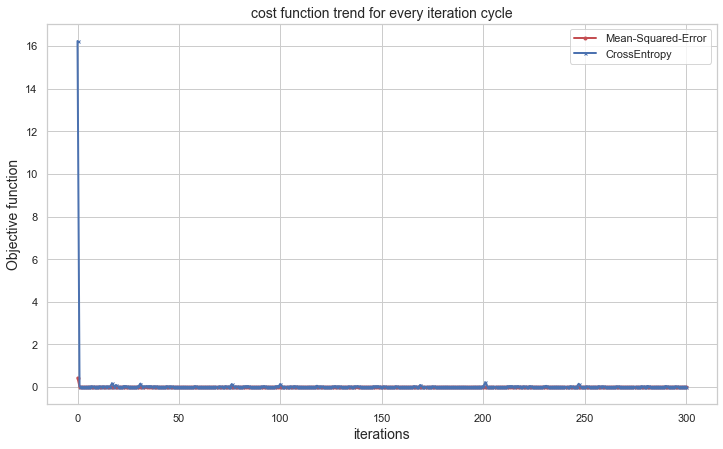

Mean-Squred-Metric ---------


{'TP': 106,
 'FP': 17,
 'FN': 35,
 'TN': 85285,
 'Precision': 0.8617886178861789,
 'Recall': 0.75177304964539,
 'Accuracy': 0.9993914071369217,
 'F1_Score': 0.803030303030303,
 'confusion_matrix': prediction (col)      0    1
 actual (row)                
 0.0               85285   17
 1.0                  35  106}

Cross-Entrop-Metric --------


{'TP': 48,
 'FP': 5,
 'FN': 93,
 'TN': 85297,
 'Precision': 0.9056603773584906,
 'Recall': 0.3404255319148936,
 'Accuracy': 0.9988530365272755,
 'F1_Score': 0.4948453608247423,
 'confusion_matrix': prediction (col)      0   1
 actual (row)               
 0.0               85297   5
 1.0                  93  48}

Estimated-Params -----------


,W_0,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,...,W_19,W_20,W_21,W_22,W_23,W_24,W_25,W_26,W_27,bias
initial,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.500000
estimated_MSE,0.168321,-1.422726,-1.114376,-2.286385,-0.963065,0.819401,-1.848582,-0.102343,-2.133800,-0.771617,...,-0.038901,0.248492,0.734833,0.432432,0.901212,-0.261955,-1.295701,-0.438895,0.200878,-34.664437
estimated_CrossEntropy,0.053101,-0.011622,0.028935,0.023983,0.006728,0.001555,0.022638,0.009060,-0.004637,-0.040632,...,-0.033610,0.032075,0.020443,-0.014262,0.020120,-0.000787,0.007954,-0.038425,-0.005134,-0.250373


In [18]:
# combine results together 
estimated_params = pd.DataFrame()
estimated_params['initial']                = np.append(initial_weights, initial_bias)
estimated_params['estimated_MSE']          = np.append(estimated_params_MSE[0], estimated_params_MSE[1])
estimated_params['estimated_CrossEntropy'] = np.append(estimated_params_CE[0], estimated_params_CE[1])
estimated_params = estimated_params.T
estimated_params.index = ['initial', 'estimated_MSE', 'estimated_CrossEntropy']
estimated_params.columns = ['W_'+str(feature) for feature in range(0, NUMBER_OF_FEATURES)] + ['bias']

# evaluate results 
evaluated_result_MSE = evaluate(test_features[:, 1:], test_labels, estimated_params_MSE, False)
evaluated_result_CE  = evaluate(test_features[:, 1:], test_labels, estimated_params_CE, False)

# plot trend of objective function
plt.figure(figsize=(12,7))
plt.plot(obj_fun_trend_MSE, 'r-o', markersize=3, linewidth=2)
plt.plot(obj_fun_trend_CE, 'b-x', markersize=3, linewidth=2)
plt.xlabel('iterations', fontsize=14)
plt.ylabel('Objective function', fontsize=14)
plt.legend(['Mean-Squared-Error', 'CrossEntropy'])
plt.title("cost function trend for every iteration cycle", fontsize=14)
plt.grid(True)
plt.show()

# print metrics
print("Mean-Squred-Metric ---------")
display(evaluated_result_MSE)

print("Cross-Entrop-Metric --------")
display(evaluated_result_CE)

print("Estimated-Params -----------")
display(estimated_params)

## Handling class imbalance
In this current dataset, the positive class (Fraudulent class) only accounts for 0.17% of the whole data. So, to improve Recall rate, we need to give our model sufficient amount of data belonging to Fraudulent class. There are multiple ways to deal with this.
* **Up-Sampling Minority class**
 - We randomly at uniform sample existing minority class data and append to the existing data. This way, the model will be able to see the fraudulent/minority class data more-often than before.
* **Down-Sampling Majority class**
 - We randomly at uniform sample down existing majority class data.
* **Penalize algorithm/Class weights (Cost-Sensitive Training)**
 - We penalize more when our algorithm does bad for minority class interms of cost function which will increase the error and the model will be able to estimate properly
* **Data Augmentation**
 - We can also augment data by deterministic noise upto to extent (based on the data) and feed it to the model

  
The cost function now becomes, 
$$ min \space J(X,W,b,Y) = \frac{-1}{N}\left[W_1 Y^T\log(\sigma(Z)) + W_0 (1-Y)^T\log(1-\sigma(Z))\right] $$
where, 
> $W_0$ and $W_1$, are the weights for the class negative and positive respectively  
> $\sigma(Z)$, is the sigmoid function and $Z = f(X,W,b)$

The gradient now becomes,
\begin{eqnarray}
\frac{\partial J}{\partial W} &=& \frac{1}{N}\sum\left[\left(W_0 \sigma(Z) - W_1 Y\right) - \left(W_0 - W_1\right)Y\sigma(Z) \right]X^T\\
\frac{\partial J}{\partial b} &=& \frac{1}{N}\sum\left[\left(W_0 \sigma(Z) - W_1 Y\right) - \left(W_0 - W_1\right)Y\sigma(Z) \right]
\end{eqnarray}

In [19]:
def cost_function_CrossEntropy_weighted(data, decision_vars, class_labels, class_weight=None):
    # data: size (N x D)
    # decision_vars: size (K x D)
    # class_labels: size (K x N)
    
    pos_weight = 1.0
    neg_weight = 1.0
    if (class_weight != None):
        neg_weight = class_weight[0]
        pos_weight = class_weight[1]
    
    predicted_class = fit_model(data, decision_vars[0], decision_vars[1])
    
    # work around, instead of supplying 0 to log, supply some small value so as to get the desired affect in the cost
    predicted_class = np.where(predicted_class < 1e-5, 1e-8, predicted_class)
    
    predicted_neg_class = 1.0 - predicted_class
    predicted_neg_class = np.where(predicted_neg_class < 1e-5, 1e-8, predicted_neg_class)
    
    log_prediction_pos_class = np.log(predicted_class)
    log_prediction_neg_class = np.log(predicted_neg_class)
    
    desired_neg_class = neg_weight*np.subtract(1, class_labels)
    desired_pos_class = pos_weight*class_labels
    
    cross_entropy =  np.dot(log_prediction_pos_class, desired_pos_class) \
                   + np.dot(log_prediction_neg_class, desired_neg_class)
      
    cross_entropy_mean = -cross_entropy/data.shape[0]
    return cross_entropy_mean

def model_gradient_CrossEntropy_weighted(data, decision_vars, class_labels, class_weight=None):
    gradient  = np.empty((2,1), dtype=object)
    data_len  = data.shape[0]
    
    pos_weight = 1.0
    neg_weight = 1.0
    if (class_weight != None):
        neg_weight = class_weight[0]
        pos_weight = class_weight[1]
    
    weight_diff = neg_weight - pos_weight   
    
    model_val = fit_model(data, decision_vars[0], decision_vars[1])
    
    model_val_weighted   = neg_weight*model_val
    class_label_weighted = pos_weight*class_labels
    error                = np.subtract(model_val_weighted, class_label_weighted)
    
    if ((weight_diff > 1e-3) or (weight_diff < -1e-3)):
        subtractive_term = np.multiply(model_val, class_labels)
        subtractive_term = weight_diff*subtractive_term
        error = np.subtract(error, subtractive_term)
    
    error_X   = np.matmul(error, data)
    
    # dJ/dW
    gradient[0][0] = error_X/data_len
    
    # dJ/db
    # as this error term will be the same, just take one of them
    gradient[1][0] = np.array(np.mean(error))
    
    return gradient

In [20]:
# Let's say the goal is to be able to classify 85% of the Fraudulent transactions correct

# Using class weights we can penalize cost function whenever the data classifies fraudulent transactions wrong
# in this example POSITIVE: FRAUDULENT, NEGATIVE: CLEAN_TRANSACTION
# For Binary classification, negative class weight is fixed at 1, as it is 0
class_weights = [1, 25] # [negative, positive]

estimated_params_CE_wgt, obj_fun_trend_CE_wgt = steepest_descent(train_features[0:sample_size, 1:], 
                                                                 train_labels[0:sample_size], 
                                                                 [initial_weights, initial_bias], 
                                                                 cost_function_CrossEntropy_weighted,
                                                                 model_gradient_CrossEntropy_weighted, 
                                                                 n_iter=350,
                                                                 step_size=0.45,
                                                                 batch_size=500,
                                                                 class_weight=class_weights)

Cross-Entropy-UnWeighted --------


{'TP': 48,
 'FP': 5,
 'FN': 93,
 'TN': 85297,
 'Precision': 0.9056603773584906,
 'Recall': 0.3404255319148936,
 'Accuracy': 0.9988530365272755,
 'F1_Score': 0.4948453608247423,
 'confusion_matrix': prediction (col)      0   1
 actual (row)               
 0.0               85297   5
 1.0                  93  48}

Cross-Entropy-Weighted ----------


{'TP': 117,
 'FP': 165,
 'FN': 24,
 'TN': 85137,
 'Precision': 0.4148936170212766,
 'Recall': 0.8297872340425532,
 'Accuracy': 0.9977879990168884,
 'F1_Score': 0.553191489361702,
 'confusion_matrix': prediction (col)      0    1
 actual (row)                
 0.0               85137  165
 1.0                  24  117}

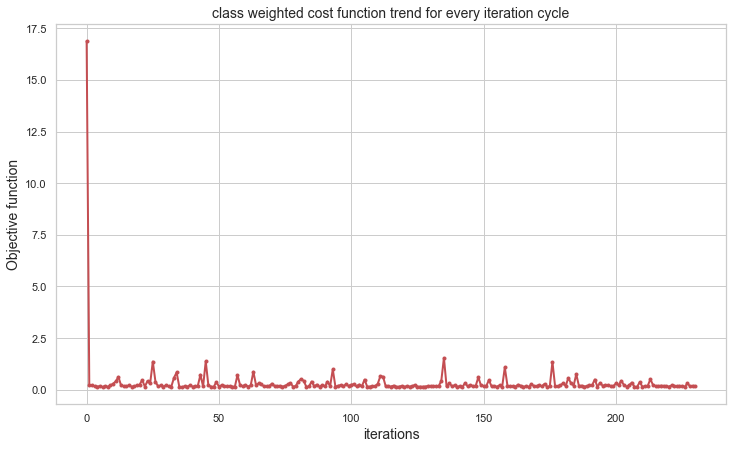

In [21]:
evaluated_result_CE     = evaluate(test_features[:, 1:], test_labels, estimated_params_CE, False)
evaluated_result_CE_wgt = evaluate(test_features[:, 1:], test_labels, estimated_params_CE_wgt, False)

print("Cross-Entropy-UnWeighted --------")
display(evaluated_result_CE)

print("Cross-Entropy-Weighted ----------")
display(evaluated_result_CE_wgt)

# plot trend of objective function
plt.figure(figsize=(12,7))
plt.plot(obj_fun_trend_CE_wgt, 'r-o', markersize=3, linewidth=2)
plt.xlabel('iterations', fontsize=14)
plt.ylabel('Objective function', fontsize=14)
plt.title("class weighted cost function trend for every iteration cycle", fontsize=14)
plt.grid(True)
plt.show()

In [22]:
# Using SkLearn 
from sklearn.linear_model import LogisticRegression
binary_classifier_sk = LogisticRegression(solver='lbfgs', max_iter=250, multi_class='ovr', class_weight={0: 1, 1: 25})
binary_classifier_sk.fit(train_features[0:sample_size, 1:], train_labels[0:sample_size])
predicted_labels_sk = binary_classifier_sk.predict(test_features[:, 1:])

In [23]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

evaluated_result_sk = dict()

evaluated_result_sk['recall']    = recall_score(test_labels, predicted_labels_sk)
evaluated_result_sk['precision'] = precision_score(test_labels, predicted_labels_sk)
evaluated_result_sk['accuracy']  = accuracy_score(test_labels, predicted_labels_sk)
evaluated_result_sk['f1_score']  = f1_score(test_labels, predicted_labels_sk)

print("Cross-Entropy-Weighted --------")
display(evaluated_result_CE_wgt)

print("SkLearn based Binary Classification")
display(evaluated_result_sk)

Cross-Entropy-Weighted --------


{'TP': 117,
 'FP': 165,
 'FN': 24,
 'TN': 85137,
 'Precision': 0.4148936170212766,
 'Recall': 0.8297872340425532,
 'Accuracy': 0.9977879990168884,
 'F1_Score': 0.553191489361702,
 'confusion_matrix': prediction (col)      0    1
 actual (row)                
 0.0               85137  165
 1.0                  24  117}

SkLearn based Binary Classification


{'recall': 0.8439716312056738,
 'precision': 0.6134020618556701,
 'accuracy': 0.9988647402361809,
 'f1_score': 0.7104477611940299}

In [ ]:
# Understanding the affect of batch_size and step_size on the model for a given score
batch_size_list = np.arange(50, 500, 50, dtype=np.int16)
step_size_list  = np.arange(0.25, 0.70, 0.05, dtype=np.float16)

recall_score    = np.zeros((batch_size_list.shape[0], step_size_list.shape[0]))
accuracy_score  = np.zeros(recall_score.shape)
precision_score = np.zeros(recall_score.shape)
f1_score        = np.zeros(recall_score.shape)

class_weights = [1, 25]
n_iter        = 300
initial_conditions    = [initial_weights, initial_bias] #estimated_params_CE_wgt

batch_index     = 0
step_size_index = 0
for batch_size in batch_size_list:
    for step_size in step_size_list:
        estimated_params_this_iter, _ = steepest_descent(train_features[0:sample_size, 1:], 
                                                         train_labels[0:sample_size], 
                                                         initial_conditions,
                                                         cost_function_CrossEntropy_weighted,
                                                         model_gradient_CrossEntropy_weighted, 
                                                         n_iter=n_iter,
                                                         step_size=step_size,
                                                         batch_size=batch_size)
        
        # evaluate results
        evaluated_metric_this_iter = evaluate(test_features[:, 1:], test_labels, estimated_params_this_iter, False)
        
        # store results
        recall_score[batch_index][step_size_index]    = evaluated_metric_this_iter['Recall']
        accuracy_score[batch_index][step_size_index]  = evaluated_metric_this_iter['Accuracy']
        precision_score[batch_index][step_size_index] = evaluated_metric_this_iter['Precision']
        f1_score[batch_index][step_size_index]        = evaluated_metric_this_iter['F1_Score']
        
        step_size_index += 1
        print("percent complete: %f"%((batch_index*step_size_list.size+step_size_index)/(recall_score.size)) )
    
    batch_index += 1
    step_size_index = 0

print("cross parameter testing --complete")

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.heatmap(recall_score, cmap = 'YlGnBu', 
                 xticklabels=step_size_list, yticklabels=batch_size_list)
plt.title("Recall Score", fontsize=14)
plt.xlabel('Batch size', fontsize=14)
plt.ylabel('Step Size', fontsize=14)
plt.show()


plt.figure(figsize=(12,7))
ax = sns.heatmap(precision_score, cmap = 'YlGnBu', 
                 xticklabels=step_size_list, yticklabels=batch_size_list)
plt.title("Precision Score", fontsize=14)
plt.xlabel('Batch size', fontsize=14)
plt.ylabel('Step Size', fontsize=14)
plt.show()

plt.figure(figsize=(12,7))
ax = sns.heatmap(accuracy_score, cmap = 'YlGnBu', 
                 xticklabels=step_size_list, yticklabels=batch_size_list)
plt.title("Accuracy Score", fontsize=14)
plt.xlabel('Batch size', fontsize=14)
plt.ylabel('Step Size', fontsize=14)
plt.show()

plt.figure(figsize=(12,7))
ax = sns.heatmap(f1_score, cmap = 'YlGnBu', 
                 xticklabels=step_size_list, yticklabels=batch_size_list)
plt.title("F1 Score", fontsize=14)
plt.xlabel('Batch size', fontsize=14)
plt.ylabel('Step Size', fontsize=14)
plt.show()

## Regularization (weight-decay)
**[Regularization_Reference](http://neuralnetworksanddeeplearning.com/chap3.html#regularization)**  
One way to avoid over-fitting of our model is to train our samples to sufficiently large set of data. Another way to deal with this is with the concept of Regularization. There are different types of regularization (L2, L1, dropout, ...).  

### L2-Regularization 
The cost function gets augmented with an additional term as below,
$$min \space J(X,W,b,Y) = \frac{-1}{2N}\left[Y^T\log(f(X,W,b)) + (1-Y)^T\log(1-f(X,W,b))\right] + \frac{\lambda}{2N}\sum_{W} W^2$$ 
This will make our network learn with smaller weights. One reason is to avoid model fitting to noisy data. Say, we have enough parameters that will define our training data. What if we make small adjustments to the data, let's say noise/something. If we have smaller weights, the network won't be affected by it and it'll be able to predict properly. Although there is no saying that the adjustments in the data is not valid.  
The affect of $\lambda$ is to give perference on the weight minimization, smaller the $\lambda$, cost function will have smaller impact by weights. The partial derivatives of the cost will now become,  
\begin{eqnarray}
\frac{\partial J}{\partial W} &=& \frac{\partial J_0}{\partial W} + \frac{\lambda}{N}W \\
\frac{\partial J}{\partial b} &=& \frac{\partial J_0}{\partial b}
\end{eqnarray}

This way the weight update now becomes,
\begin{eqnarray} 
  W & \rightarrow & W-\alpha \frac{\partial J_0}{\partial
    W}-\frac{\eta \lambda}{N} W\\ 
  & = & \left(1-\frac{\alpha \lambda}{n}\right) W -\alpha \frac{\partial
    J_0}{\partial W}. 
\end{eqnarray}
The above equation will make the algorithm wanting to decay weights.  
Note that, regularization can be on bias term as well. 

### L1-Regularization
$$J = J_0 + \frac{\lambda}{2N}\sum_{W} |W| $$
where, 
\begin{eqnarray}
\frac{\partial J}{\partial W} &=& \frac{\partial J_0}{\partial W} + \frac{\lambda}{N}sgn(W)
\end{eqnarray}

In [69]:
def cost_function_CrossEntropy_regularization(data, decision_vars, class_labels, class_weight=None, weight_scaling=None):
    # data: size (N x D)
    # decision_vars: size (K x D)
    # class_labels: size (K x N)
    
    pos_weight = 1.0
    neg_weight = 1.0
    if (class_weight != None):
        neg_weight = class_weight[0]
        pos_weight = class_weight[1]
    
    predicted_class = fit_model(data, decision_vars[0], decision_vars[1])
    
    # work around, instead of supplying 0 to log, supply some small value so as to get the desired affect in the cost
    predicted_class = np.where(predicted_class < 1e-5, 1e-8, predicted_class)
    
    predicted_neg_class = 1.0 - predicted_class
    predicted_neg_class = np.where(predicted_neg_class < 1e-5, 1e-8, predicted_neg_class)
    
    log_prediction_pos_class = np.log(predicted_class)
    log_prediction_neg_class = np.log(predicted_neg_class)
    
    desired_neg_class = neg_weight*np.subtract(1, class_labels)
    desired_pos_class = pos_weight*class_labels
    
    cross_entropy =  np.dot(log_prediction_pos_class, desired_pos_class) \
                   + np.dot(log_prediction_neg_class, desired_neg_class)
      
    cross_entropy_mean = -cross_entropy/data.shape[0]
    
    # add regularization component
    if (weight_scaling != None):
        L2_norm_sq = np.mean(np.power(decision_vars[0], 2.0))
        L2_norm_sq = (weight_scaling/(2.0*data.shape[0])) * L2_norm_sq
        cross_entropy_mean += L2_norm_sq
    
    return cross_entropy_mean


def steepest_descent_regularization(data, class_labels, initial_conditions,
                                     cost_func, cost_func_gradient, 
                                     n_iter=100, 
                                     step_size=0.25,
                                     weight_scaling=0.2, # should be dependent on the batch-size to get desired affect
                                     batch_size=100,
                                     class_weight=None,
                                     stopping_tol=1e-3):
    
    estimated_params = initial_conditions
    cost_func_trend  = [None]*(n_iter+1)
    
    total_cost = cost_func(data, estimated_params, class_labels, class_weight, weight_scaling)
    cost_func_trend[0] = total_cost
    error = total_cost
    
    # weight scaling from regularization affect
    weight_scaling_factor = (1.0 - step_size*weight_scaling/data.shape[0])
    
    for iteration in range(0, n_iter):
        if (error > stopping_tol):
            batch_indices_list = generate_batch_indices(data.shape[0], batch_size)

            for batch_indices in batch_indices_list:
                train_data   = data[batch_indices, :]
                train_labels = class_labels[batch_indices]

                gradient = cost_func_gradient(train_data, estimated_params, train_labels, class_weight)

                # update Weights
                estimated_params[0] = np.add(weight_scaling_factor*estimated_params[0], -step_size*gradient[0][0])

                # update bias
                estimated_params[1] = np.add(estimated_params[1], -step_size*gradient[1][0])

            total_cost = cost_func(data, estimated_params, class_labels, class_weight, weight_scaling)

            cost_func_trend[iteration+1] = total_cost
            error = np.abs(total_cost - error)
    
    return estimated_params, cost_func_trend

In [78]:
class_weights= [1, 25]
initial_conditions = [initial_weights, initial_bias]
estimated_params_CE_rgld, obj_func_trend_CE_rgld = steepest_descent_regularization(train_features[0:sample_size, 1:], 
                                                                                 train_labels[0:sample_size], 
                                                                                 initial_conditions,
                                                                                 cost_function_CrossEntropy_regularization,
                                                                                 model_gradient_CrossEntropy_weighted, 
                                                                                 n_iter=350,
                                                                                 step_size=0.30,
                                                                                 batch_size=500,
                                                                                 class_weight=class_weights,
                                                                                 weight_scaling=10.0)

weighted + Unregularized ------ 


{'TP': 117,
 'FP': 165,
 'FN': 24,
 'TN': 85137,
 'Precision': 0.4148936170212766,
 'Recall': 0.8297872340425532,
 'Accuracy': 0.9977879990168884,
 'F1_Score': 0.553191489361702,
 'confusion_matrix': prediction (col)      0    1
 actual (row)                
 0.0               85137  165
 1.0                  24  117}

weighted + regularized   ------ 


{'TP': 120,
 'FP': 110,
 'FN': 21,
 'TN': 85192,
 'Precision': 0.5217391304347826,
 'Recall': 0.851063829787234,
 'Accuracy': 0.9984668141333989,
 'F1_Score': 0.6469002695417789,
 'confusion_matrix': prediction (col)      0    1
 actual (row)                
 0.0               85192  110
 1.0                  21  120}

,W_0,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,...,W_19,W_20,W_21,W_22,W_23,W_24,W_25,W_26,W_27,bias
initial,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.10000,0.100000,0.100000,0.100000,0.500000
CE_weighted_noRegularization,0.243628,-0.073653,0.035636,0.226936,-0.023388,-0.037312,0.015263,-0.039450,-0.113685,-0.365759,...,0.025803,-0.108191,0.256501,0.002313,-0.038070,-0.04930,-0.139865,-0.046974,0.177083,-1.040810
CE_weighted_regularization,-0.047624,0.059150,-0.052255,0.131497,-0.107453,-0.050601,-0.173839,0.069771,-0.112110,-0.299136,...,0.040009,0.023102,0.051671,-0.009547,0.000573,0.02644,-0.078496,0.087718,0.086625,-0.604303


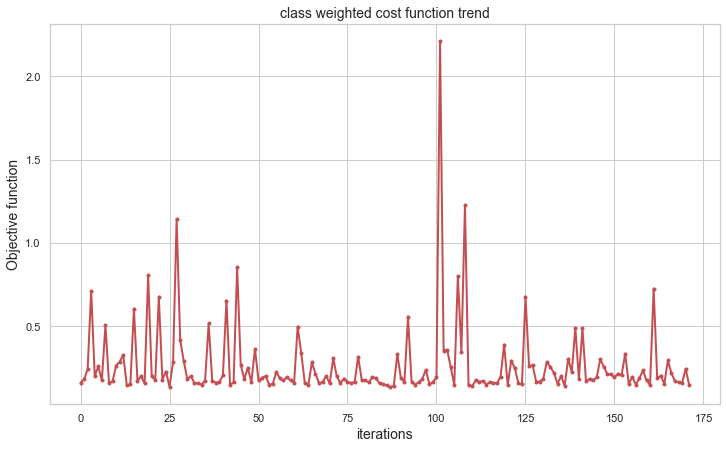

In [79]:
# evaluate results
evaluated_result_CE_rgld = evaluate(test_features[:, 1:], test_labels, estimated_params_CE_rgld, False)

# combine results together 
estimated_params = pd.DataFrame()
estimated_params['initial']                      = np.append(initial_weights, initial_bias)
estimated_params['CE_weighted_noRegularization'] = np.append(estimated_params_CE_wgt[0], estimated_params_CE_wgt[1])
estimated_params['CE_weighted_regularization']   = np.append(estimated_params_CE_rgld[0], estimated_params_CE_rgld[1])
estimated_params = estimated_params.T
estimated_params.index = ['initial', 'CE_weighted_noRegularization', 'CE_weighted_regularization']
estimated_params.columns = ['W_'+str(feature) for feature in range(0, NUMBER_OF_FEATURES)] + ['bias']

print("weighted + Unregularized ------ ")
display(evaluated_result_CE_wgt)

print("weighted + regularized   ------ ")
display(evaluated_result_CE_rgld)

display(estimated_params)

# plot trend of objective function
plt.figure(figsize=(12,7))
plt.plot(obj_func_trend_CE_rgld[1:], 'r-o', markersize=3, linewidth=2)
plt.xlabel('iterations', fontsize=14)
plt.ylabel('Objective function', fontsize=14)
plt.title("class weighted cost function trend", fontsize=14)
plt.grid(True)
plt.show()


# References
**[Latex in Markdown](https://github.com/cben/mathdown/wiki/math-in-markdown)**  
**[Mini_Batch_Stochastic_Gradient_Descent](https://gluon.mxnet.io/chapter06_optimization/gd-sgd-scratch.html)**  
**[Logistic_Regression_wiki](https://en.wikipedia.org/wiki/Logistic_regression)**  
**[Logistic_Regression_ML](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)**  
**[Logistic_Regression_Andrew_NG](http://www.holehouse.org/mlclass/06_Logistic_Regression.html)**  
**[Logistic_Regression_GitHub](https://github.com/iamkucuk/Logistic-Regression-With-Mini-Batch-Gradient-Descent/blob/master/logistic_regression_notebook.ipynb)**  
**[Cross_Entropy_Cost_Function](http://neuralnetworksanddeeplearning.com/chap3.html)**  